In [1]:
import sys
sys.path.append("../image")
import krige


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pyart

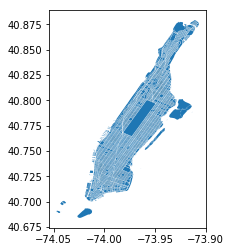

In [4]:
krige.pluto.to_crs(epsg=4326).plot()

In [5]:
radar = pyart.io.read_nexrad_archive("data/2017-09/01/KOKX20170901_000243_V06.ar2v")


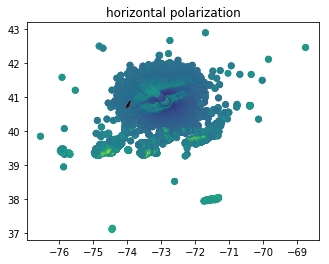

In [6]:
lats = radar.gate_latitude['data']
lons = radar.gate_longitude['data']
vals = radar.get_field(0, 'reflectivity')
x = radar.gate_x['data']
y = radar.gate_y['data']
z = radar.gate_z['data']

pc = plt.scatter(lons[:720].reshape(-1), lats[:720].reshape(-1), c=vals.reshape(-1))
fig = pc.get_figure()
ax = fig.get_axes()[0]
#ax.plot([min_lon, max_lon], [min_lat, max_lat], c='red')
ax.set_title("horizontal polarization")

krige.pluto.to_crs(epsg=4326).plot(ax=ax, color='red')

In [11]:
vals = radar.get_field(0, 'reflectivity')
x = radar.gate_x['data']
y = radar.gate_y['data']
z = radar.gate_z['data']
lons, lats = pyart.core.cartesian_to_geographic_aeqd(x, y, radar.longitude['data'], radar.latitude['data'])

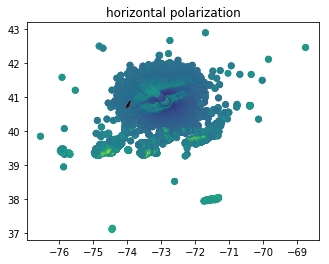

In [12]:
pc = plt.scatter(lons[:720].reshape(-1), lats[:720].reshape(-1), c=vals.reshape(-1))
fig = pc.get_figure()
ax = fig.get_axes()[0]
#ax.plot([min_lon, max_lon], [min_lat, max_lat], c='red')
ax.set_title("horizontal polarization")

krige.pluto.to_crs(epsg=4326).plot(ax=ax, color='red')

In [16]:
import pyart_utils as pu

In [26]:
res, radar = pu.load_filter_dbzh("data/2017-09/11/KOKX20170911_000714_V06.ar2v", True, True, True, True)

In [27]:
interpd = pu.interp_radar_values(res, pu.MN_INIT_CUT, pu.LOWER_MN)

In [28]:
result, transformed, xx, yy = interpd

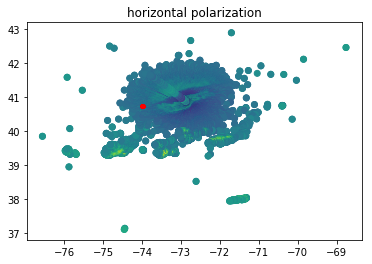

In [29]:
pc = plt.scatter(lons[:720].reshape(-1), lats[:720].reshape(-1), c=vals.reshape(-1))
fig = pc.get_figure()
ax = fig.get_axes()[0]
#ax.plot([min_lon, max_lon], [min_lat, max_lat], c='red')
ax.set_title("horizontal polarization")

ax.scatter(transformed[0], transformed[1], c = 'red', s=.1)